In [1]:
import pandas as pd
data = pd.read_excel('Arvand_1.xlsx')
data

,KOD,Birthday,Birthday1,Year,Married,Gender,Nationality,Educ,FamilySize,BusExper,...,"Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)",Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль
0,70081389,1975,1925-02-05,1975.0,Оиладор,Мужской,Узбек,Оли,3,15,...,Категория 2,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0
1,70068103,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 4,0.0,0.0,0.0,11,5,5,1,0.0,0.0
2,70084699,1933,1933-03-27,NaN,Оиладор,Мужской,Точик,Миёна,3,NaN,...,Категория 3,0.0,0.0,0.0,0,0,0,2,0.0,1648.0
3,70067500,1933,1933-11-27,NaN,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,...,Категория 2,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0
4,1047372,1938,1938-04-23,1938.0,Оиладор,Мужской,Узбек,Миёна,1,5,...,Категория 4,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,210106137,1984,NaT,1984.0,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,...,Категория 2,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0
85418,210107051,1990,NaT,1990.0,Беоила,Мужской,Узбек,Миёна,1,NaN,...,Категория 2,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0
85419,210108260,1974,NaT,1974.0,Оиладор,Женский,Узбек,Оли,3,NaN,...,Категория 2,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0
85420,210108426,1985,NaT,1985.0,Оиладор,Мужской,Узбек,Миёна,2,5,...,Категория 3,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0


# 1)Подготовкаданных

### Удаление ненужных ячеек

In [2]:
#создаем новый датафрейм, для того чтобы не изменять data
data1=data.copy()

In [3]:
# Создаем новый столбец 'Combined_Birthday'
data1['Combined_Birthday'] = pd.NaT  # Инициализируем пустыми значениями

# Цикл для создания новой даты и заполнения столбца 'Combined_Birthday'
for index, row in data1.iterrows():
    #Берем год рождения из столбца Birthday, если ячейка пустая, то в качестве года рождения устанавливаем 1960г
    YY = row['Birthday'] if not pd.isnull(row['Birthday']) else 1960
    #Берем день рождения из столбца Birthday1, если ячейка пустая, то в качестве дня рождения устанавливаем 1
    dd = row['Birthday1'].day if not pd.isnull(row['Birthday1']) else 1
    #Берем месяц рождения из столбца Birthday1, если ячейка пустая, то в качестве месяца рождения устанавливаем январь
    mm = row['Birthday1'].month if not pd.isnull(row['Birthday1']) else 1
    #Заполняем новый столбец датой рождения в формата %d-%m-%Y
    combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')
    data1.at[index, 'Combined_Birthday'] = combined_date


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\1421378734.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  combined_date = pd.to_datetime(f"{dd}-{mm}-{YY}", errors='coerce')


In [5]:
#Удаляем явно ненужные столбцы
data1 = data1.drop(['KOD', 'Birthday1', 'Year', 'Birthday'], axis=1)

KeyError: "['KOD', 'Birthday1', 'Year', 'Birthday'] not found in axis"

In [6]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0.0,0.0,53,14,6,1,2500.0,2683.0,1984-01-01
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,5000.0,5000.0,0.0,0,0,0,1,7360.0,6536.0,1990-01-01
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,51600.0,96400.0,44800.0,0,0,0,1,5630.0,6043.0,1974-01-01
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,12600.0,12600.0,0.0,2,1,2,1,0.0,780.0,1985-01-01


In [7]:
print(data1['Дата выдачи'])

0       2015-01-19
1       2014-03-05
2       2015-04-01
3       2014-02-21
4       2014-01-13
           ...    
85417   2015-07-16
85418   2015-09-02
85419   2015-11-17
85420   2015-11-12
85421   2015-11-11
Name: Дата выдачи, Length: 85422, dtype: datetime64[ns]


In [8]:
import numpy as np
# Создание нового столбца "Age". От даты выдачи кредита отнимаем год рождения.
#Так как результат выводит только количество дней, поэтому делим на 365.25, чтобы учивать также высокосные годы
data1['Age'] = (data1['Дата выдачи'] - data1['Combined_Birthday']).dt.days / 365.25


In [9]:
#Все значения столбца Age делаем целочисенным
data1.Age = data1['Age'].astype(int)

In [10]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Combined_Birthday,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,3000.0,0.0,46,23,4,1,0.0,180.0,1975-05-02,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,11,5,5,1,0.0,0.0,1933-03-27,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0,0,0,2,0.0,1648.0,1933-03-27,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5200.0,0.0,0,0,0,1,0.0,150.0,1933-11-27,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,7600.0,543.0,15,14,2,2,0.0,280.0,1938-04-23,75


In [11]:
#Удаляем столбец Combined_Birthday, так как он больше нам не нужен
data1=data1.drop('Combined_Birthday', axis=1)

In [12]:
data1.head()

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,2820.0,3000.0,0.0,46,23,4,1,0.0,180.0,39
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0.0,0.0,11,5,5,1,0.0,0.0,80
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0.0,0.0,0,0,0,2,0.0,1648.0,82
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,5050.0,5200.0,0.0,0,0,0,1,0.0,150.0,80
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,6777.0,7600.0,543.0,15,14,2,2,0.0,280.0,75


#### Преобразование категориальных переменных в фиктивные переменные (переменные со значениеми 0 и 1 и т.д.) 

In [13]:
data1['Married'].unique()

array(['Оиладор', 'Беоила', 'Бевамард (бевазан)', 'Чудошуда'],
      dtype=object)

In [14]:
#для Married
#data1.loc[data1['Married'] == 'Беоила', 'isMarried'] = 0
#data1.loc[data1['Married'] == 'Оиладор', 'isMarried'] = 1
#data1.loc[data1['Married'] == 'Бевамард (бевазан)', 'isMarried'] = 2
#data1.loc[data1['Married'] == 'Чудошуда', 'isMarried'] = 3


import pandas as pd
# Создание фиктивных переменных
dummy_variables = pd.get_dummies(data1['Married'])
data1 = pd.concat([data1, dummy_variables], axis=1)

# Вывод результата
print(data1)

       Married   Gender Nationality           Educ FamilySize BusExper  \
0      Оиладор  Мужской       Узбек            Оли          3       15   
1      Оиладор  Мужской       Точик          Миёна          3      NaN   
2      Оиладор  Мужской       Точик          Миёна          3      NaN   
3       Беоила  Женский       Точик  Миёнаи махсус   Нет инфо        3   
4      Оиладор  Мужской       Узбек          Миёна          1        5   
...        ...      ...         ...            ...        ...      ...   
85417  Оиладор  Мужской       Узбек          Миёна   Нет инфо       10   
85418   Беоила  Мужской       Узбек          Миёна          1      NaN   
85419  Оиладор  Женский       Узбек            Оли          3      NaN   
85420  Оиладор  Мужской       Узбек          Миёна          2        5   
85421  Оиладор  Женский       Узбек          Миёна          2        4   

           Filial         Region  \
0      Истаравшан      Шахристон   
1      Истаравшан      Гули сурх   
2  

In [15]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,Максимальные дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,Валовая прибыль,Чистая прибыль,Age,Бевамард (бевазан),Беоила,Оиладор,Чудошуда
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,23,4,1,0.0,180.0,39,0,0,1,0
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,5,5,1,0.0,0.0,80,0,0,1,0
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0,0,2,0.0,1648.0,82,0,0,1,0
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,0,0,1,0.0,150.0,80,0,1,0,0
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,14,2,2,0.0,280.0,75,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,14,6,1,2500.0,2683.0,31,0,0,1,0
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,0,0,1,7360.0,6536.0,25,0,1,0,0
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,0,0,1,5630.0,6043.0,41,0,0,1,0
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,1,2,1,0.0,780.0,30,0,0,1,0


In [16]:
data1['Gender'].unique()

array(['Мужской', 'Женский'], dtype=object)

In [17]:
#для Gender
data1.loc[data1['Gender'] == 'Мужской', 'isFemale'] = 0
data1.loc[data1['Gender'] == 'Женский', 'isFemale'] = 1

In [18]:
columns = ['Nationality', 'Educ', 'Filial', 'Region', 
      'Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)',
     'Навпреление деятельности', 'Продукт', 'Сектор', 'Валюта кредита']
for column in columns:
    print(column, data1[column].unique())

Nationality ['Узбек' 'Точик' 'Тотор' 'Рус' 'Киргиз' 'Украин' 'Другие' 'Карис'
 'Карачои']
Educ ['Оли' 'Миёна' 'Миёнаи махсус' 'Олии нопурра' 'Миёнаи нопурра'
 'Аспирантура']
Filial ['Истаравшан' 'Хучанд' 'Ч. Расулов' 'Душанбе' 'Исфара' 'Панчакент']
Region ['Шахристон' 'Гули сурх' 'Худжанд-Центр' 'Спитамен' 'Шарк' 'Мархамат'
 'Душанбе' 'Навкент' 'Кистакуз' 'Худжанд-Панчшанбе' 'Бустон'
 'Истаравшан-филиал' 'Рудаки' 'Ашт' 'Калининобод' 'Сино' 'Исфара' 'Хисор'
 'Зафаробод' 'Ничони' 'Вахдат' 'Мехнатобод' 'Уяс' 'Дж.Расулов' 'Конибодом'
 'Дусти' 'Ниёзбек' 'Истаравшан' 'Рогун' 'Гончи' 'Чашмасор' 'Нофароч'
 'Ободи' 'Каракчикум' 'Оббурдон' 'Куруш' 'Ворух' 'Гулякандоз' 'Некфайз'
 'Сомгор' 'Пунук' 'Панчакент' 'Кулканд' 'Оппон' 'Файзобод' 'Турсунзода'
 'Гусар' 'Равшан' 'Ифтихор' 'Х.Алиев' 'Ёри' 'Мучун' 'Саразм']
Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет) ['Бовари' 'Хамкори' 'Шарик' 'VIP']
Навпреление деятельности ['Чорводори ва коркарди шир' 'Приоб

In [19]:
import pandas as pd
# Создание фиктивных переменных
dummy_variables1 = pd.get_dummies(data1['Nationality'])
data1 = pd.concat([data1, dummy_variables1], axis=1)

# Вывод результата
print(data1)

       Married   Gender Nationality           Educ FamilySize BusExper  \
0      Оиладор  Мужской       Узбек            Оли          3       15   
1      Оиладор  Мужской       Точик          Миёна          3      NaN   
2      Оиладор  Мужской       Точик          Миёна          3      NaN   
3       Беоила  Женский       Точик  Миёнаи махсус   Нет инфо        3   
4      Оиладор  Мужской       Узбек          Миёна          1        5   
...        ...      ...         ...            ...        ...      ...   
85417  Оиладор  Мужской       Узбек          Миёна   Нет инфо       10   
85418   Беоила  Мужской       Узбек          Миёна          1      NaN   
85419  Оиладор  Женский       Узбек            Оли          3      NaN   
85420  Оиладор  Мужской       Узбек          Миёна          2        5   
85421  Оиладор  Женский       Узбек          Миёна          2        4   

           Filial         Region  \
0      Истаравшан      Шахристон   
1      Истаравшан      Гули сурх   
2  

In [20]:
data1

,Married,Gender,Nationality,Educ,FamilySize,BusExper,Filial,Region,"Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)",Навпреление деятельности,...,isFemale,Другие,Карачои,Карис,Киргиз,Рус,Тотор,Точик,Узбек,Украин
0,Оиладор,Мужской,Узбек,Оли,3,15,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,0.0,0,0,0,0,0,0,0,1,0
1,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Бовари,Приобретение техники,...,0.0,0,0,0,0,0,0,1,0,0
2,Оиладор,Мужской,Точик,Миёна,3,NaN,Истаравшан,Гули сурх,Хамкори,Ремонт дома,...,0.0,0,0,0,0,0,0,1,0,0
3,Беоила,Женский,Точик,Миёнаи махсус,Нет инфо,3,Истаравшан,Шахристон,Бовари,Чорводори ва коркарди шир,...,1.0,0,0,0,0,0,0,1,0,0
4,Оиладор,Мужской,Узбек,Миёна,1,5,Хучанд,Худжанд-Центр,Хамкори,Чорводори ва коркарди шир,...,0.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,Оиладор,Мужской,Узбек,Миёна,Нет инфо,10,Ч. Расулов,Куруш,Бовари,Чорводори ва коркарди шир,...,0.0,0,0,0,0,0,0,0,1,0
85418,Беоила,Мужской,Узбек,Миёна,1,NaN,Ч. Расулов,Спитамен,Хамкори,Кишту кор,...,0.0,0,0,0,0,0,0,0,1,0
85419,Оиладор,Женский,Узбек,Оли,3,NaN,Ч. Расулов,Гулякандоз,VIP,Ремонт дома,...,1.0,0,0,0,0,0,0,0,1,0
85420,Оиладор,Мужской,Узбек,Миёна,2,5,Ч. Расулов,Дж.Расулов,Шарик,Чорводори ва коркарди шир,...,0.0,0,0,0,0,0,0,0,1,0


In [21]:
#для Educ
import pandas as pd
# Создание фиктивных переменных
dummy_variables2 = pd.get_dummies(data1['Educ'])
data1 = pd.concat([data1, dummy_variables2], axis=1)

# Вывод результата
print(data1)

       Married   Gender Nationality           Educ FamilySize BusExper  \
0      Оиладор  Мужской       Узбек            Оли          3       15   
1      Оиладор  Мужской       Точик          Миёна          3      NaN   
2      Оиладор  Мужской       Точик          Миёна          3      NaN   
3       Беоила  Женский       Точик  Миёнаи махсус   Нет инфо        3   
4      Оиладор  Мужской       Узбек          Миёна          1        5   
...        ...      ...         ...            ...        ...      ...   
85417  Оиладор  Мужской       Узбек          Миёна   Нет инфо       10   
85418   Беоила  Мужской       Узбек          Миёна          1      NaN   
85419  Оиладор  Женский       Узбек            Оли          3      NaN   
85420  Оиладор  Мужской       Узбек          Миёна          2        5   
85421  Оиладор  Женский       Узбек          Миёна          2        4   

           Filial         Region  \
0      Истаравшан      Шахристон   
1      Истаравшан      Гули сурх   
2  

In [22]:
#кодировка столбца Filial с помощью `map`
filial_map={'Истаравшан':0, 'Хучанд':1, 'Ч. Расулов':2, 'Душанбе':3, 'Исфара':4, 'Панчакент':5}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Filial_code']=data1['Filial'].map(filial_map)

In [23]:
#автоматичнская кодировка значений столбца Region(порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Region_code'], _ = pd.factorize(data1['Region'])

In [24]:
#кодировка столбца 'Уровень клиента' с помощью `map`
client_map={'Бовари':0, 'Хамкори':1, 'Шарик':2, 'VIP':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Уровень клиента']=data1['Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)'].map(client_map)

In [25]:
#автоматичнская кодировка значений столбца 'Навпреление деятельности' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Направление_деятельности'], _ = pd.factorize(data1['Навпреление деятельности'])

In [26]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Кредит на предпринимательскую деятельность':0, 'Потребительский кредит':1,
 'Энергосберегающие технологии':2, 'Жилищный кредит':3}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Тип кредита']=data1['Продукт'].map(product_map)

In [27]:
#автоматичнская кодировка значений столбца 'Сектор' (порядок будет соответствовать что и при выполнении data1[column].unique())
data1['Цель кредита'], _ = pd.factorize(data1['Сектор'])

In [28]:
#кодировка столбца 'Продукт' с помощью `map`
product_map={'Доллар США':0, 'Сомони':1, 'Рос.рубль':2}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Валюта_код']=data1['Валюта кредита'].map(product_map)

In [29]:
#Кодируем 'FamilySize' для 'Нет инфо'
data1.loc[data1['FamilySize'] == 'Нет инфо', 'FamilySize'] = 0
data1['FamilySize'].fillna(0, inplace=True)

In [30]:
#уникальные значения Залога
data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].unique()

array(['Категория 2', 'Категория 4', 'Категория 3', 'Группа',
       'Категория 1'], dtype=object)

In [31]:
#кодировка столбца 'Залог...' с помощью `map`
zalog_map={'Группа':0, 'Категория 1':1, 'Категория 2':2, 'Категория 3':3, 'Категория 4':4}
#Создаем новый столбец и присваиваем ему кодированные значения
data1['Залог_код']=data1['Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)'].map(zalog_map)

In [32]:
data1 = data1.drop(['Married', 'Залог (группа-поручительство, категория 1 - недвижимость, категория 2-движимое имущество, категория 3-поручительство, категория 4 - без залога)', 'Gender', 'Nationality','Educ','Filial','Region','Уровень клиента (Бовари до 1 год, Хамкори от 1 до 3 лет, Шарик от 3 до 5 лет, VIPболее 5 лет)','Навпреление деятельности','Продукт','Сектор','Валюта кредита'], axis=1)

In [33]:
data1

,FamilySize,BusExper,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,...,Оли,Олии нопурра,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код
0,3,15,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,...,1,0,0,0,0,0,0.0,0,0,2
1,3,NaN,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,...,0,0,0,1,0,1,1.0,1,1,4
2,3,NaN,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,...,0,0,0,1,1,2,1.0,2,1,3
3,0,3,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,...,0,0,0,0,0,0,0.0,0,1,2
4,1,5,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,...,0,0,1,2,1,0,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,10,2015-07-16,5000.0,12,2016-07-14,558.00,1.0,0.0,0.0,...,0,0,2,35,0,0,0.0,0,1,2
85418,1,NaN,2015-09-02,1400.0,24,2017-09-04,74.00,0.0,5000.0,5000.0,...,0,0,2,3,1,4,0.0,5,0,2
85419,3,NaN,2015-11-17,30000.0,36,2018-11-19,1264.00,1.0,51600.0,96400.0,...,1,0,2,37,3,2,3.0,11,1,2
85420,2,5,2015-11-12,3000.0,12,2016-11-14,295.00,0.0,12600.0,12600.0,...,0,0,2,23,2,0,0.0,0,1,3


In [34]:
for column in data1:
    if data1[column].dtype == 'O':  # Используем 'O' для строковых данных
        unique_values = data1[column].unique()
        unique_values = sorted(unique_values, key=lambda x: (str(x), x is None, isinstance(x, (int, float)))) #Для сортировки по возрастанию
        print(column, unique_values)

BusExper [',', 0, 0.4, '0.5', 0.5, 0.6, 0.7, 0.8, 1, 1.1, 1.3, 1.4, 1.5, 1.6, 1.7, 10, 100, 11, 113, 12, 123, 13, 14, 141, 15, 16, 17, 18, 19, '1мох', 2, 2.3, 2.4, 2.5, 2.7, 20, '20+', 21, 215, 22, 23, 24, 25, 26, 27, 28, 29, 3, 3.5, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, '4-мох', 4.5, 4.6, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, '4ё', 5, '5 мох', 50, 521, 6, '6-мох', 6.5, 60, '6мес', '6мох', 7, '7-мох', 73, 75, 8, '8-мох', 9, nan, 'мир', 'ъолия']


In [35]:
# Кодировка столбца 'BusExper' с помощью `map`
bus_map = {
    ',': 0, 0: 0, 0.4: 0, '0.5': 0, 0.5: 0, 0.6: 0, 0.7: 0, 0.8: 0, 1: 0, 1.1: 0, 1.3: 0, 1.4: 0, 1.5: 0, 1.6: 0, 1.7: 0, '1мох': 0, 2: 0,
    2.3: 0, 2.4: 0, 2.5: 0, 2.7: 0, 3: 0, 3.5: 0, 4: 0, '4-мох': 0, 4.5: 0, 4.6: 0, 5: 0, '5 мох': 0, 'мир': 0,
    6: 1, '6-мох': 0, 6.5: 1, '6мес': 0, '6мох': 0, 7: 1, '7-мох': 0, 8: 1, '8-мох': 0, 9: 1, 10: 1, 100: 1,
    11: 2, 113: 2, 123: 2, 12: 2, 13: 2, 14: 2, 15: 2,
    16: 3, 17: 3, 18: 3, 19: 3, 20: 3,
    '20+': 4, 21: 4, 215: 4, 22: 4, 23: 4, 24: 4, 25: 4,
    26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5,
    141: 6, 41: 6, 42: 6, 43: 6, 44: 6, 45: 6, 46: 6, 47: 6, 48: 6, 49: 6, '4ё': 6, 50: 6,
    521: 7, 73: 7, 75: 7, 'ъолия': 7
}

# Создаем новый столбец и присваиваем ему кодированные значения
data1['business_experience'] = data1['BusExper'].map(bus_map)


Я разделил BusExper на интервалы 0-5 лет стажа, которое принимает метку 0, 5-10 лет - метка 1, 10-15 лет - метка 2, 15-20 лет стажа - метка 3, 20-25 лет - метка 4, 25-40 лет - метка 5, 40-50 лет стажа - метка 6, 50+ лет стажа - метка 7. При этом я предполагал, что значения больше 100 были введени случайно, и присваивал каждый к интервалу, которые больше всего подходит

In [36]:
data1['business_experience'].unique()

array([ 2., nan,  0.,  4.,  1.,  5.,  3.,  6.,  7.])

In [37]:
data1 = data1.drop('BusExper', axis=1)

In [38]:
data1.head()

,FamilySize,Дата выдачи,Сумма кредита,Срок кредита,Дата окончания по графику,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,...,Олии нопурра,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
0,3,2015-01-19,1000.0,12,2016-01-18,181.00,6.0,2820.0,3000.0,0.0,...,0,0,0,0,0,0.0,0,0,2,2.0
1,3,2014-03-05,1000.0,12,2015-03-05,109.67,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1.0,1,1,4,NaN
2,3,2015-04-01,7600.0,12,2016-04-01,805.00,0.0,0.0,0.0,0.0,...,0,0,1,1,2,1.0,2,1,3,NaN
3,0,2014-02-21,1500.0,12,2015-02-20,162.93,1.0,5050.0,5200.0,0.0,...,0,0,0,0,0,0.0,0,1,2,0.0
4,1,2014-01-13,2500.0,12,2015-01-13,465.94,6.0,6777.0,7600.0,543.0,...,0,1,2,1,0,0.0,0,1,4,0.0


In [39]:
#Поменяем валюту кредита на сомони в соответствии с курсом валют в 2014 и в 2015гг
Dollar_2014 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2014)
Dollar_2015 = (data1['Валюта_код'] == 0) & (data1['Дата выдачи'].dt.year == 2015)
Ruble_2014 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2014)
Ruble_2015 = (data1['Валюта_код'] == 2) & (data1['Дата выдачи'].dt.year == 2015)

data1.loc[Dollar_2014, 'Сумма кредита'] *= 5.1181
data1.loc[Dollar_2015, 'Сумма кредита'] *= 6.7932
data1.loc[Ruble_2014, 'Сумма кредита'] *= 0.088
data1.loc[Ruble_2015, 'Сумма кредита'] *= 0.1024

#### Заполнение пустых ячеек

In [40]:
data1 = data1.drop(['Дата выдачи','Дата окончания по графику'], axis=1)

In [41]:
data1.isnull().sum()

FamilySize                                            0
Сумма кредита                                         0
Срок кредита                                          0
Ежемесячная сумма погашения по графику                0
Льготный период (месяц)                            1515
Капитал                                              66
Актив                                                36
Обязательства                                        39
Дни просрочки                                         0
Максимальные дни просрочки                            0
Количество просрочек                                  0
Этап кредитования (который раз получает кредит        0
Валовая прибыль                                    5715
Чистая прибыль                                     5715
Age                                                   0
Бевамард (бевазан)                                    0
Беоила                                                0
Оиладор                                         

In [42]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Олии нопурра,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,83907.000000,8.535600e+04,8.538600e+04,85383.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85336.000000,85422.000000,85422.000000,85422.000000,65069.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.901033,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.014563,1.616726,18.679403,0.808351,2.855740,0.477161,2.378673,0.805308,1.930077,1.271619
std,1.832014,13459.155442,5.396642,1292.947867,2.698440,5.030853e+04,5.448567e+04,4213.904780,48.960655,37.944300,...,0.119796,1.494246,13.519625,0.993673,3.632346,0.755313,3.219755,0.416906,1.506449,1.443552
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.466000e+03,6.565000e+03,0.000000,1.000000,1.000000,...,0.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.198100e+04,1.350000e+04,77.000000,7.000000,4.000000,...,0.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,1.000000,5.000000,52.000000,3.000000,23.000000,3.000000,25.000000,2.000000,4.000000,7.000000


In [43]:
from fancyimpute import IterativeImputer
import pandas as pd

# Список столбцов для предсказания
columns_to_fill = ['Льготный период (месяц)', 'Капитал', 'Актив', 'Обязательства', 'Валовая прибыль', 'Чистая прибыль', 'Тип кредита','business_experience']

# Проходим по всем столбцам для проверки корреляции
for column in columns_to_fill:
    # Проверяем корреляцию только для столбцов с числовыми данными
    if data1[column].dtype in ['int64', 'float64']:
        # Выбираем строки, где нет пропущенных значений в текущем столбце
        valid_data = data1[columns_to_fill + [column]].dropna()

        # Проверяем, что в данных для обучения модели нет пропущенных значений
        if not valid_data.isnull().values.any():
            # Используем fancyimpute для итеративной импутации (заполнения)
            imputer = IterativeImputer(sample_posterior=True, max_iter=10, random_state=0)
            imputed_values = imputer.fit_transform(data1[columns_to_fill + [column]])

            mask = data1[column].isnull()
            data1.loc[mask, column] = imputed_values[mask, -1]

In [44]:
#Все значения столбцов делаем целочисенным после импутации
data1[['Льготный период (месяц)', 'Тип кредита','business_experience']] = data1[['Льготный период (месяц)', 'Тип кредита','business_experience']].astype(int)

In [45]:
data1.isnull().sum()

FamilySize                                        0
Сумма кредита                                     0
Срок кредита                                      0
Ежемесячная сумма погашения по графику            0
Льготный период (месяц)                           0
Капитал                                           0
Актив                                             0
Обязательства                                     0
Дни просрочки                                     0
Максимальные дни просрочки                        0
Количество просрочек                              0
Этап кредитования (который раз получает кредит    0
Валовая прибыль                                   0
Чистая прибыль                                    0
Age                                               0
Бевамард (бевазан)                                0
Беоила                                            0
Оиладор                                           0
Чудошуда                                          0
isFemale    

In [46]:
data1.describe()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Максимальные дни просрочки,...,Олии нопурра,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience
count,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,8.542200e+04,8.542200e+04,85422.000000,85422.000000,85422.000000,...,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000,85422.000000
mean,2.675774,6716.636227,12.763843,582.871092,1.885053,1.059435e+04,1.210464e+04,702.061148,15.161340,8.826848,...,0.014563,1.616726,18.679403,0.808351,2.855740,0.476680,2.378673,0.805308,1.930077,1.206902
std,1.832014,13459.155442,5.396642,1292.947867,2.677047,5.028910e+04,5.447419e+04,4212.942715,48.960655,37.944300,...,0.119796,1.494246,13.519625,0.993673,3.632346,0.755085,3.219755,0.416906,1.506449,1.265196
min,0.000000,50.000000,1.000000,2.000000,0.000000,-6.271500e+04,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2000.000000,12.000000,164.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4000.000000,12.000000,333.000000,1.000000,5.475000e+03,6.600000e+03,0.000000,1.000000,1.000000,...,0.000000,1.000000,16.000000,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,7000.000000,12.000000,632.000000,3.000000,1.197225e+04,1.350000e+04,80.000000,7.000000,4.000000,...,0.000000,3.000000,29.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000
max,8.000000,339660.000000,120.000000,196947.000000,24.000000,9.679096e+06,1.049900e+07,266840.000000,913.000000,634.000000,...,1.000000,5.000000,52.000000,3.000000,23.000000,3.000000,25.000000,2.000000,4.000000,7.000000


Судя по описательной статистике до и после импутации можно сказать, что множественная импутация заполнила значения довольно хорошо, так как сильных разбросов в значениях описательной статистике не видно

In [47]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Бевамард (бевазан)', 'Беоила', 'Оиладор',
       'Чудошуда', 'isFemale', 'Другие', 'Карачои', 'Карис', 'Киргиз', 'Рус',
       'Тотор', 'Точик', 'Узбек', 'Украин', 'Аспирантура', 'Миёна',
       'Миёнаи махсус', 'Миёнаи нопурра', 'Оли', 'Олии нопурра', 'Filial_code',
       'Region_code', 'Уровень клиента', 'Направление_деятельности',
       'Тип кредита', 'Цель кредита', 'Валюта_код', 'Залог_код',
       'business_experience'],
      dtype='object')

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FamilySize                                      85422 non-null  int64  
 1   Сумма кредита                                   85422 non-null  float64
 2   Срок кредита                                    85422 non-null  int64  
 3   Ежемесячная сумма погашения по графику          85422 non-null  float64
 4   Льготный период (месяц)                         85422 non-null  int32  
 5   Капитал                                         85422 non-null  float64
 6   Актив                                           85422 non-null  float64
 7   Обязательства                                   85422 non-null  float64
 8   Дни просрочки                                   85422 non-null  int64  
 9   Максимальные дни просрочки             

# 2)Проводите разведочный анализ данных (Exploratory data analysis)

### А) найдите параметры описательной статистики по некоторым значимым переменам

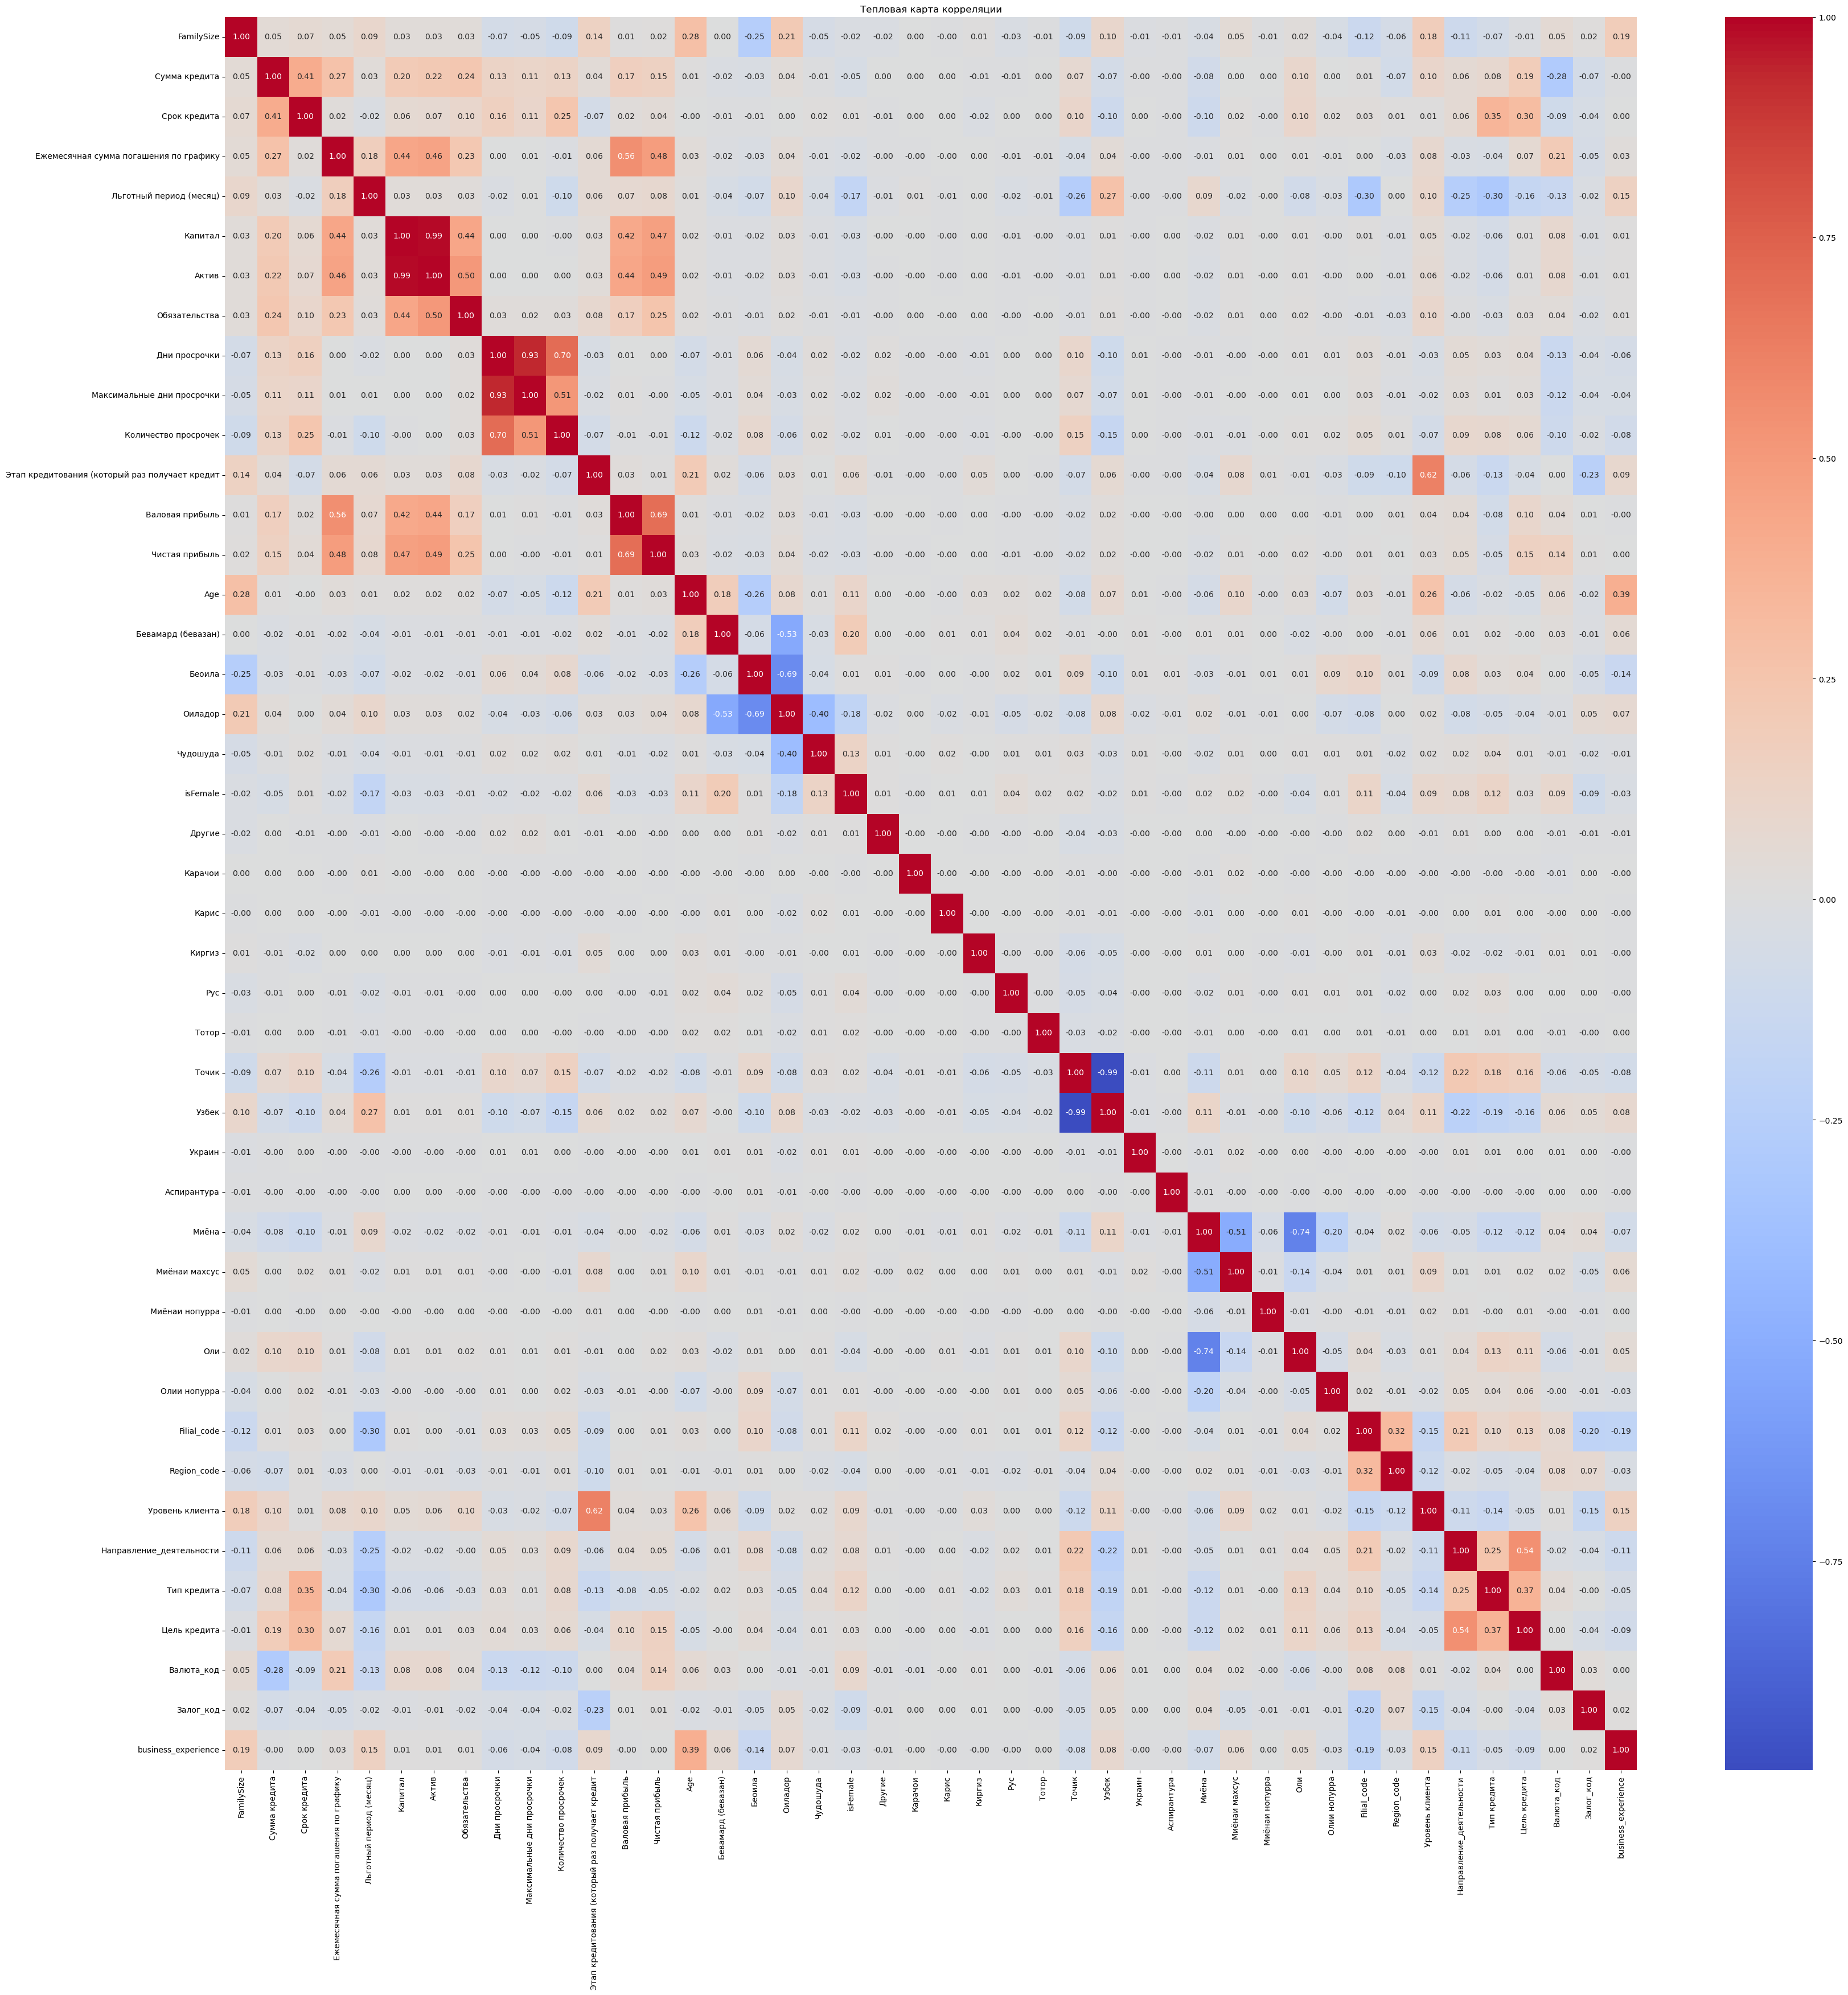

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

In [50]:
#Удаляем переменные, у которых корреляция по отношению ко всем другим переменным ниже 0.35
data1 = data1.drop(['FamilySize', 'Льготный период (месяц)', 'isMarried', 'isFemale','Nationality_code',
                   'Educ_code','Filial_code','Filial_code','Валюта_код','Залог_код', 'Ежемесячная сумма погашения по графику', 'Капитал','Актив'], axis=1)

KeyError: "['isMarried', 'Nationality_code', 'Educ_code'] not found in axis"

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FamilySize                                      85422 non-null  int64  
 1   Сумма кредита                                   85422 non-null  float64
 2   Срок кредита                                    85422 non-null  int64  
 3   Ежемесячная сумма погашения по графику          85422 non-null  float64
 4   Льготный период (месяц)                         85422 non-null  int32  
 5   Капитал                                         85422 non-null  float64
 6   Актив                                           85422 non-null  float64
 7   Обязательства                                   85422 non-null  float64
 8   Дни просрочки                                   85422 non-null  int64  
 9   Максимальные дни просрочки             

In [52]:
import numpy as np
from scipy.stats import mode

mode_age = mode(data1['Age'])
print(f"Мода: {mode_age.mode[0]}, Частота: {mode_age.count[0]}")

Мода: 28, Частота: 2617


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\1152296334.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_age = mode(data1['Age'])


In [53]:
mode_term = mode(data1['Срок кредита'])
print(f"Мода: {mode_term.mode[0]}, Частота: {mode_term.count[0]}")

Мода: 12, Частота: 54960


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\2687462907.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_term = mode(data1['Срок кредита'])


In [54]:
mode_aim = mode(data1['Цель кредита'])
print(f"Мода: {mode_aim.mode[0]}, Частота: {mode_aim.count[0]}")

Мода: 0, Частота: 35349


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\126861736.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_aim = mode(data1['Цель кредита'])


In [55]:
mode_type = mode(data1['Тип кредита'])
print(f"Мода: {mode_type.mode[0]}, Частота: {mode_type.count[0]}")

Мода: 0, Частота: 54929


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\105285817.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_type = mode(data1['Тип кредита'])


In [56]:
mean_sum = data1['Сумма кредита'].mean()
print(f"Среднее значение: {mean_sum}")

Среднее значение: 6716.636227139742


In [57]:
min_sum = data1['Сумма кредита'].min()
max_sum = data1['Сумма кредита'].max()
print(f"Минимум: {min_sum}, Максимум: {max_sum}")

Минимум: 50.0, Максимум: 339660.0


### Б) нарисуйте графики (Box-plot, Scatter-plot и др.)  по некоторым значимым переменам

In [58]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85422 entries, 0 to 85421
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   FamilySize                                      85422 non-null  int64  
 1   Сумма кредита                                   85422 non-null  float64
 2   Срок кредита                                    85422 non-null  int64  
 3   Ежемесячная сумма погашения по графику          85422 non-null  float64
 4   Льготный период (месяц)                         85422 non-null  int32  
 5   Капитал                                         85422 non-null  float64
 6   Актив                                           85422 non-null  float64
 7   Обязательства                                   85422 non-null  float64
 8   Дни просрочки                                   85422 non-null  int64  
 9   Максимальные дни просрочки             

In [59]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Бевамард (бевазан)', 'Беоила', 'Оиладор',
       'Чудошуда', 'isFemale', 'Другие', 'Карачои', 'Карис', 'Киргиз', 'Рус',
       'Тотор', 'Точик', 'Узбек', 'Украин', 'Аспирантура', 'Миёна',
       'Миёнаи махсус', 'Миёнаи нопурра', 'Оли', 'Олии нопурра', 'Filial_code',
       'Region_code', 'Уровень клиента', 'Направление_деятельности',
       'Тип кредита', 'Цель кредита', 'Валюта_код', 'Залог_код',
       'business_experience'],
      dtype='object')

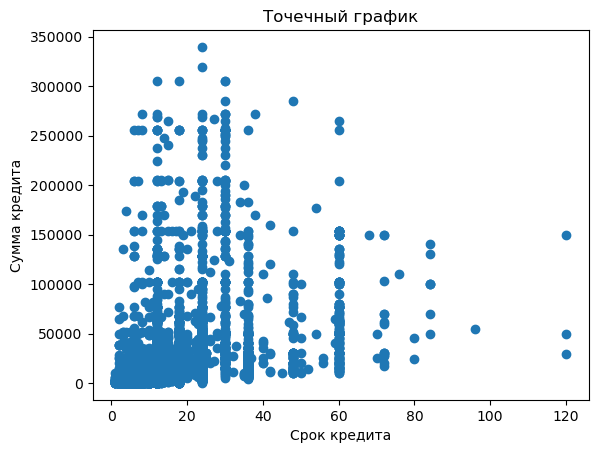

In [60]:
plt.scatter(data1['Срок кредита'], data1['Сумма кредита'])
plt.title('Точечный график')
plt.xlabel('Срок кредита')
plt.ylabel('Сумма кредита')
plt.show()

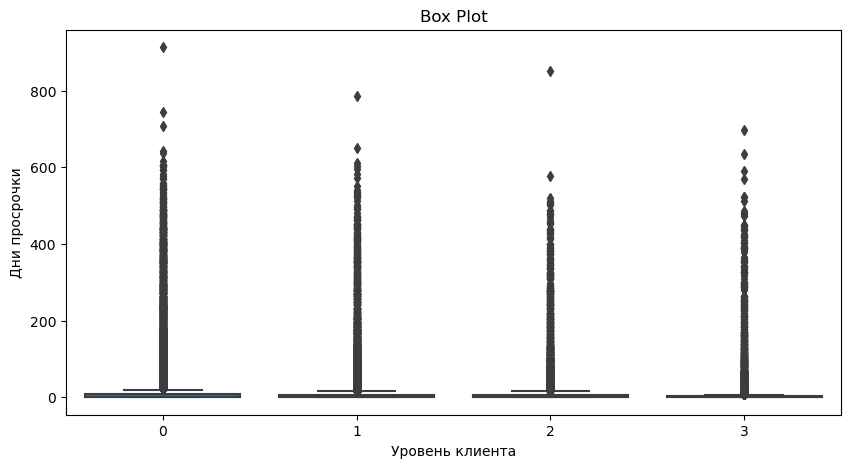

In [61]:
fig = plt.subplots(figsize=(10, 5))
sns.boxplot(x=data1['Уровень клиента'], y=data1['Дни просрочки'], data=data1)
plt.title('Box Plot')
plt.xlabel('Уровень клиента')
plt.ylabel('Дни просрочки')
plt.show()

### В) Нарисуйте корреляционную матрицу переменных с непрерывными данными

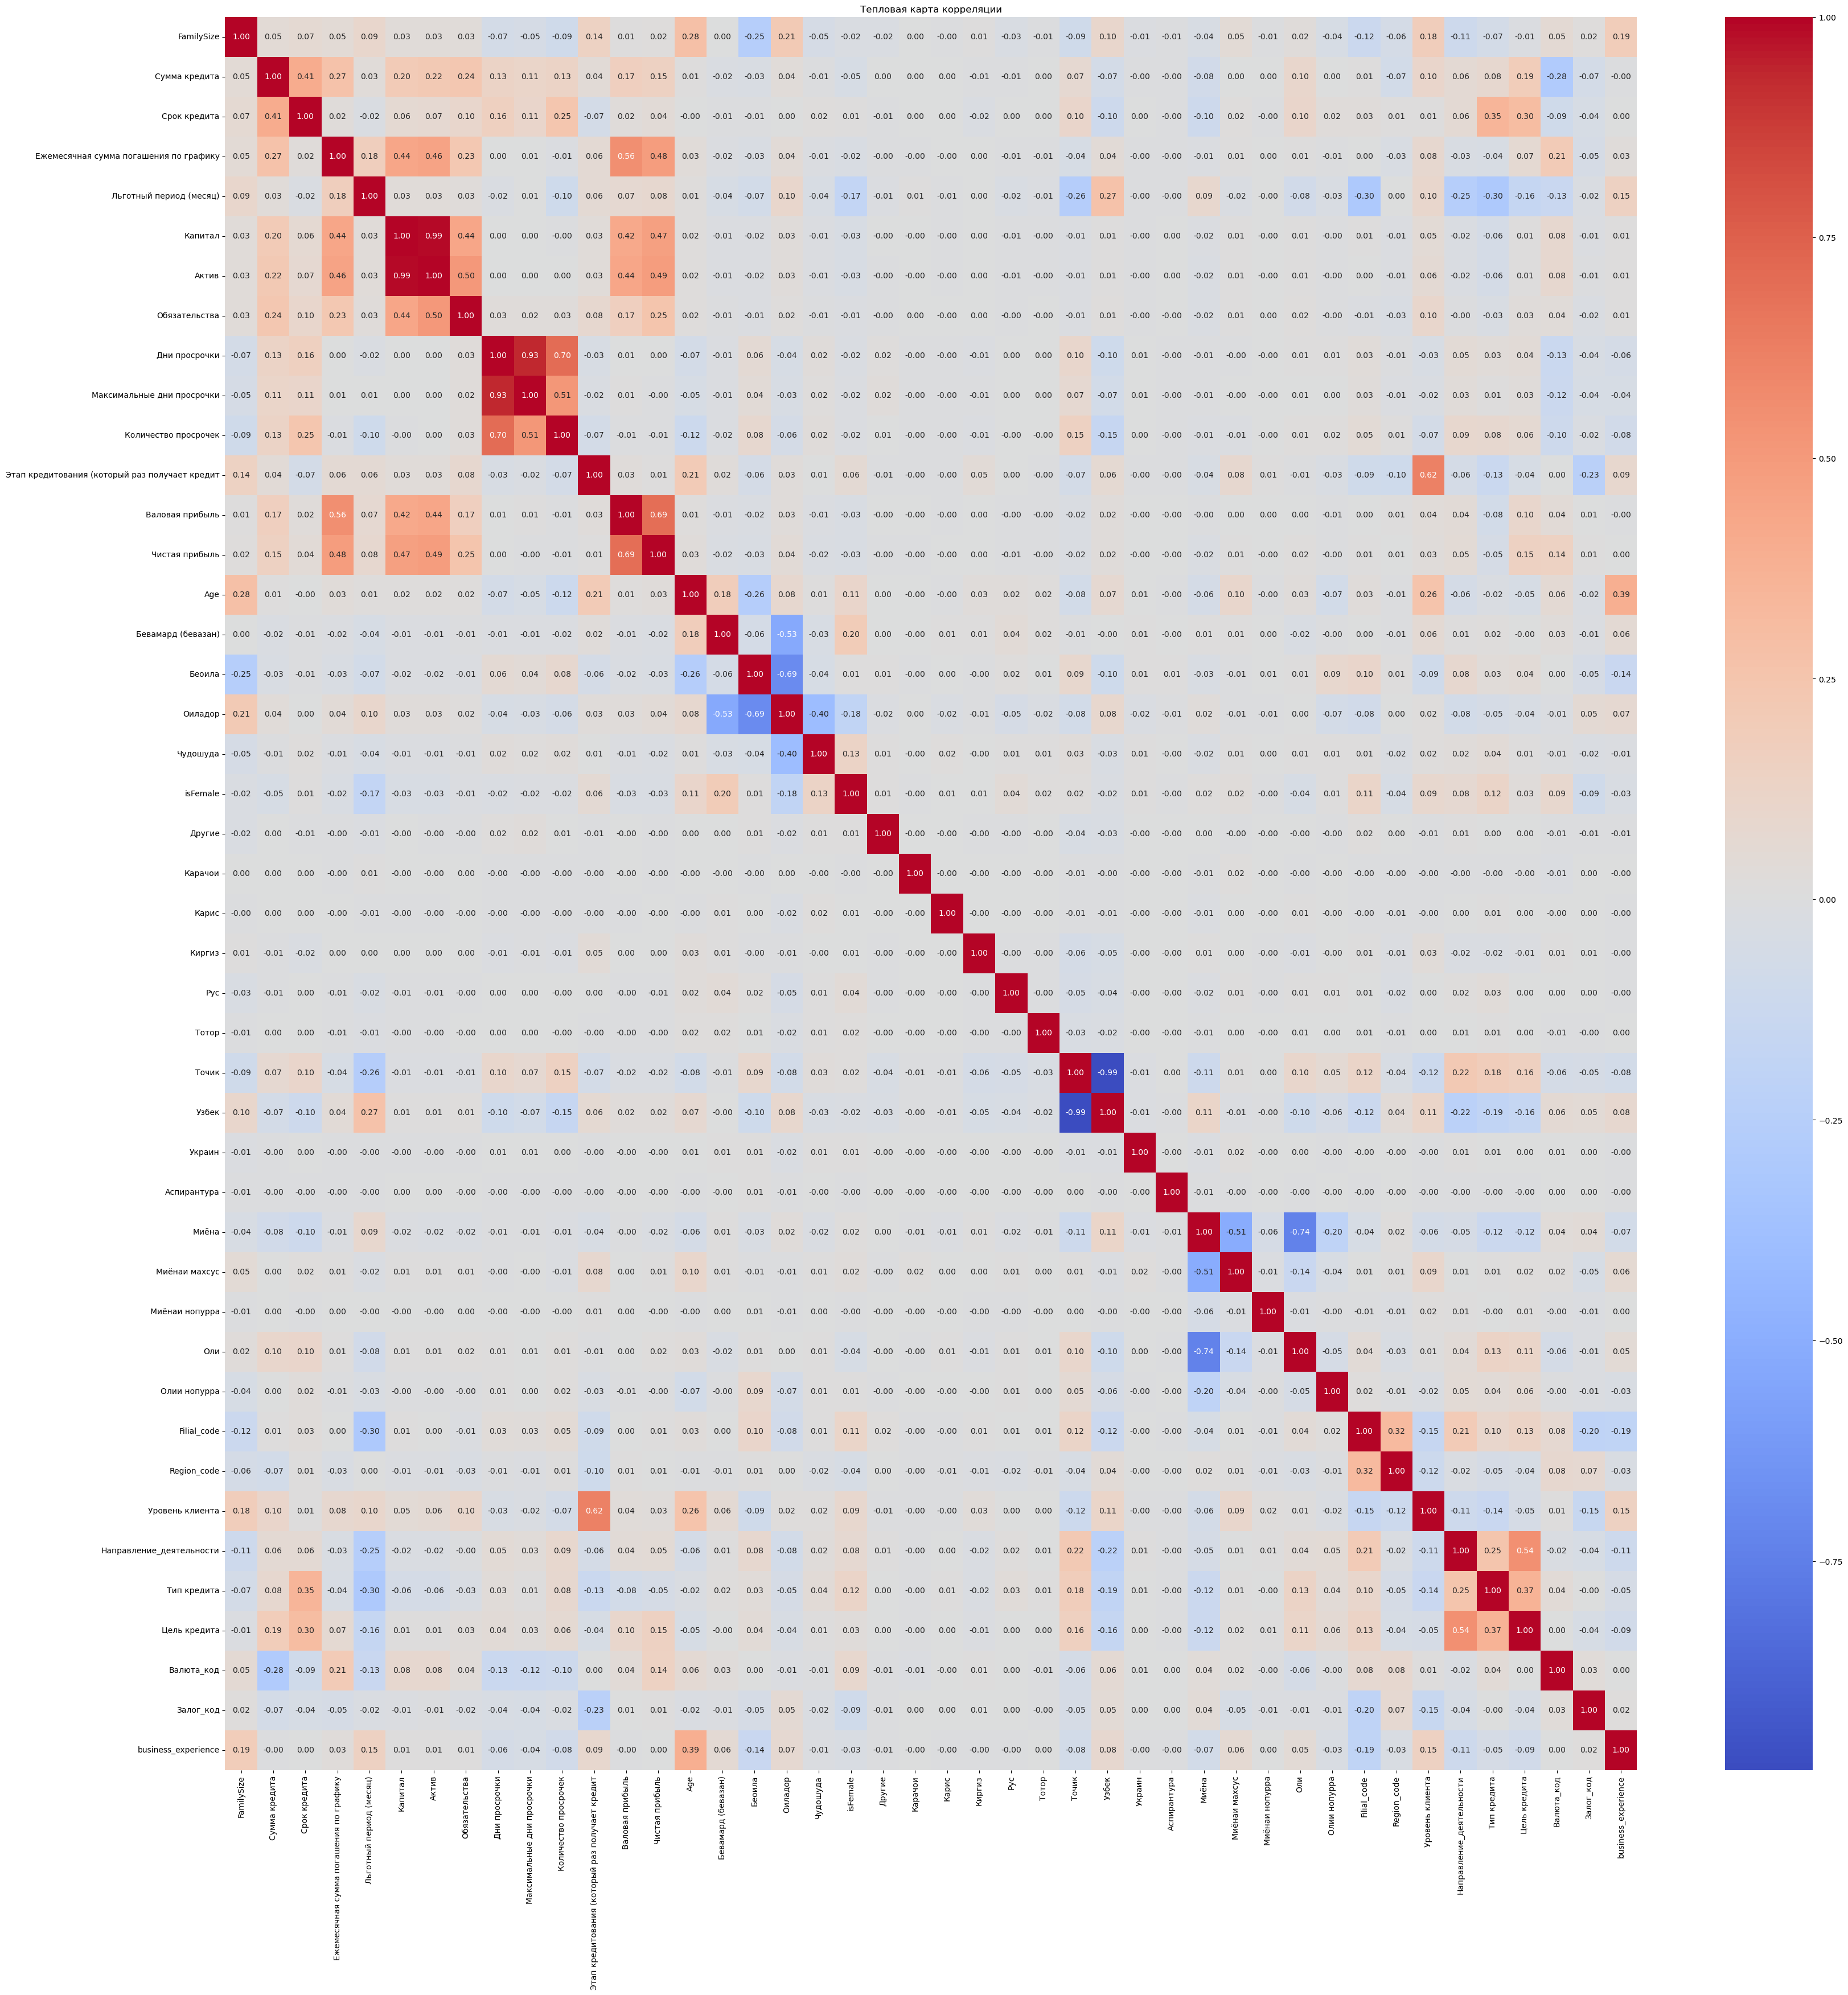

In [62]:
# Вычисляем корреляцию
correlation_matrix = data1.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()


# Устанавливаем порог для переменной «Дни просрочки» (меньше 30 дней, 0 дней, 7 дней и 15 дней, 60 дней как 1 и больше как 0 для решения задачи классификации.

In [63]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Максимальные дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Бевамард (бевазан)', 'Беоила', 'Оиладор',
       'Чудошуда', 'isFemale', 'Другие', 'Карачои', 'Карис', 'Киргиз', 'Рус',
       'Тотор', 'Точик', 'Узбек', 'Украин', 'Аспирантура', 'Миёна',
       'Миёнаи махсус', 'Миёнаи нопурра', 'Оли', 'Олии нопурра', 'Filial_code',
       'Region_code', 'Уровень клиента', 'Направление_деятельности',
       'Тип кредита', 'Цель кредита', 'Валюта_код', 'Залог_код',
       'business_experience'],
      dtype='object')

In [65]:
#Удаляем ненужный столбец
data1 = data1.drop('Максимальные дни просрочки', axis=1)

KeyError: "['Максимальные дни просрочки'] not found in axis"

In [66]:
#Создаем новый столбец среднее количество просроченных дней
data1['Сред_просрочки'] = data1['Дни просрочки']/data1['Количество просрочек']

In [67]:
data1.head()

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Filial_code,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки
0,3,6793.2,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,0,2,2,11.5
1,3,1000.0,12,109.67,0,0.0,0.0,0.0,11,5,...,0,1,0,1,1,1,1,4,1,2.2
2,3,7600.0,12,805.00,0,0.0,0.0,0.0,0,0,...,0,1,1,2,1,2,1,3,1,NaN
3,0,1500.0,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,0,1,2,0,NaN
4,1,2500.0,12,465.94,6,6777.0,7600.0,543.0,15,2,...,1,2,1,0,0,0,1,4,0,7.5


In [68]:
#Заполняем пустые ячейки значением 0, так как клиент ни разу не просрочивал
data1['Сред_просрочки'].fillna(0, inplace=True)

### Создание и заполнение нового столбца "выдача"

#### Трешхолд 30 дней

In [69]:
data1.loc[data1['Сред_просрочки']<=30, 'выдача']=1
data1.loc[data1['Сред_просрочки']>30, 'выдача']=0

In [70]:
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,1.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,1.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,1.0


In [71]:
data2 = data1.drop('Сред_просрочки', axis=1)

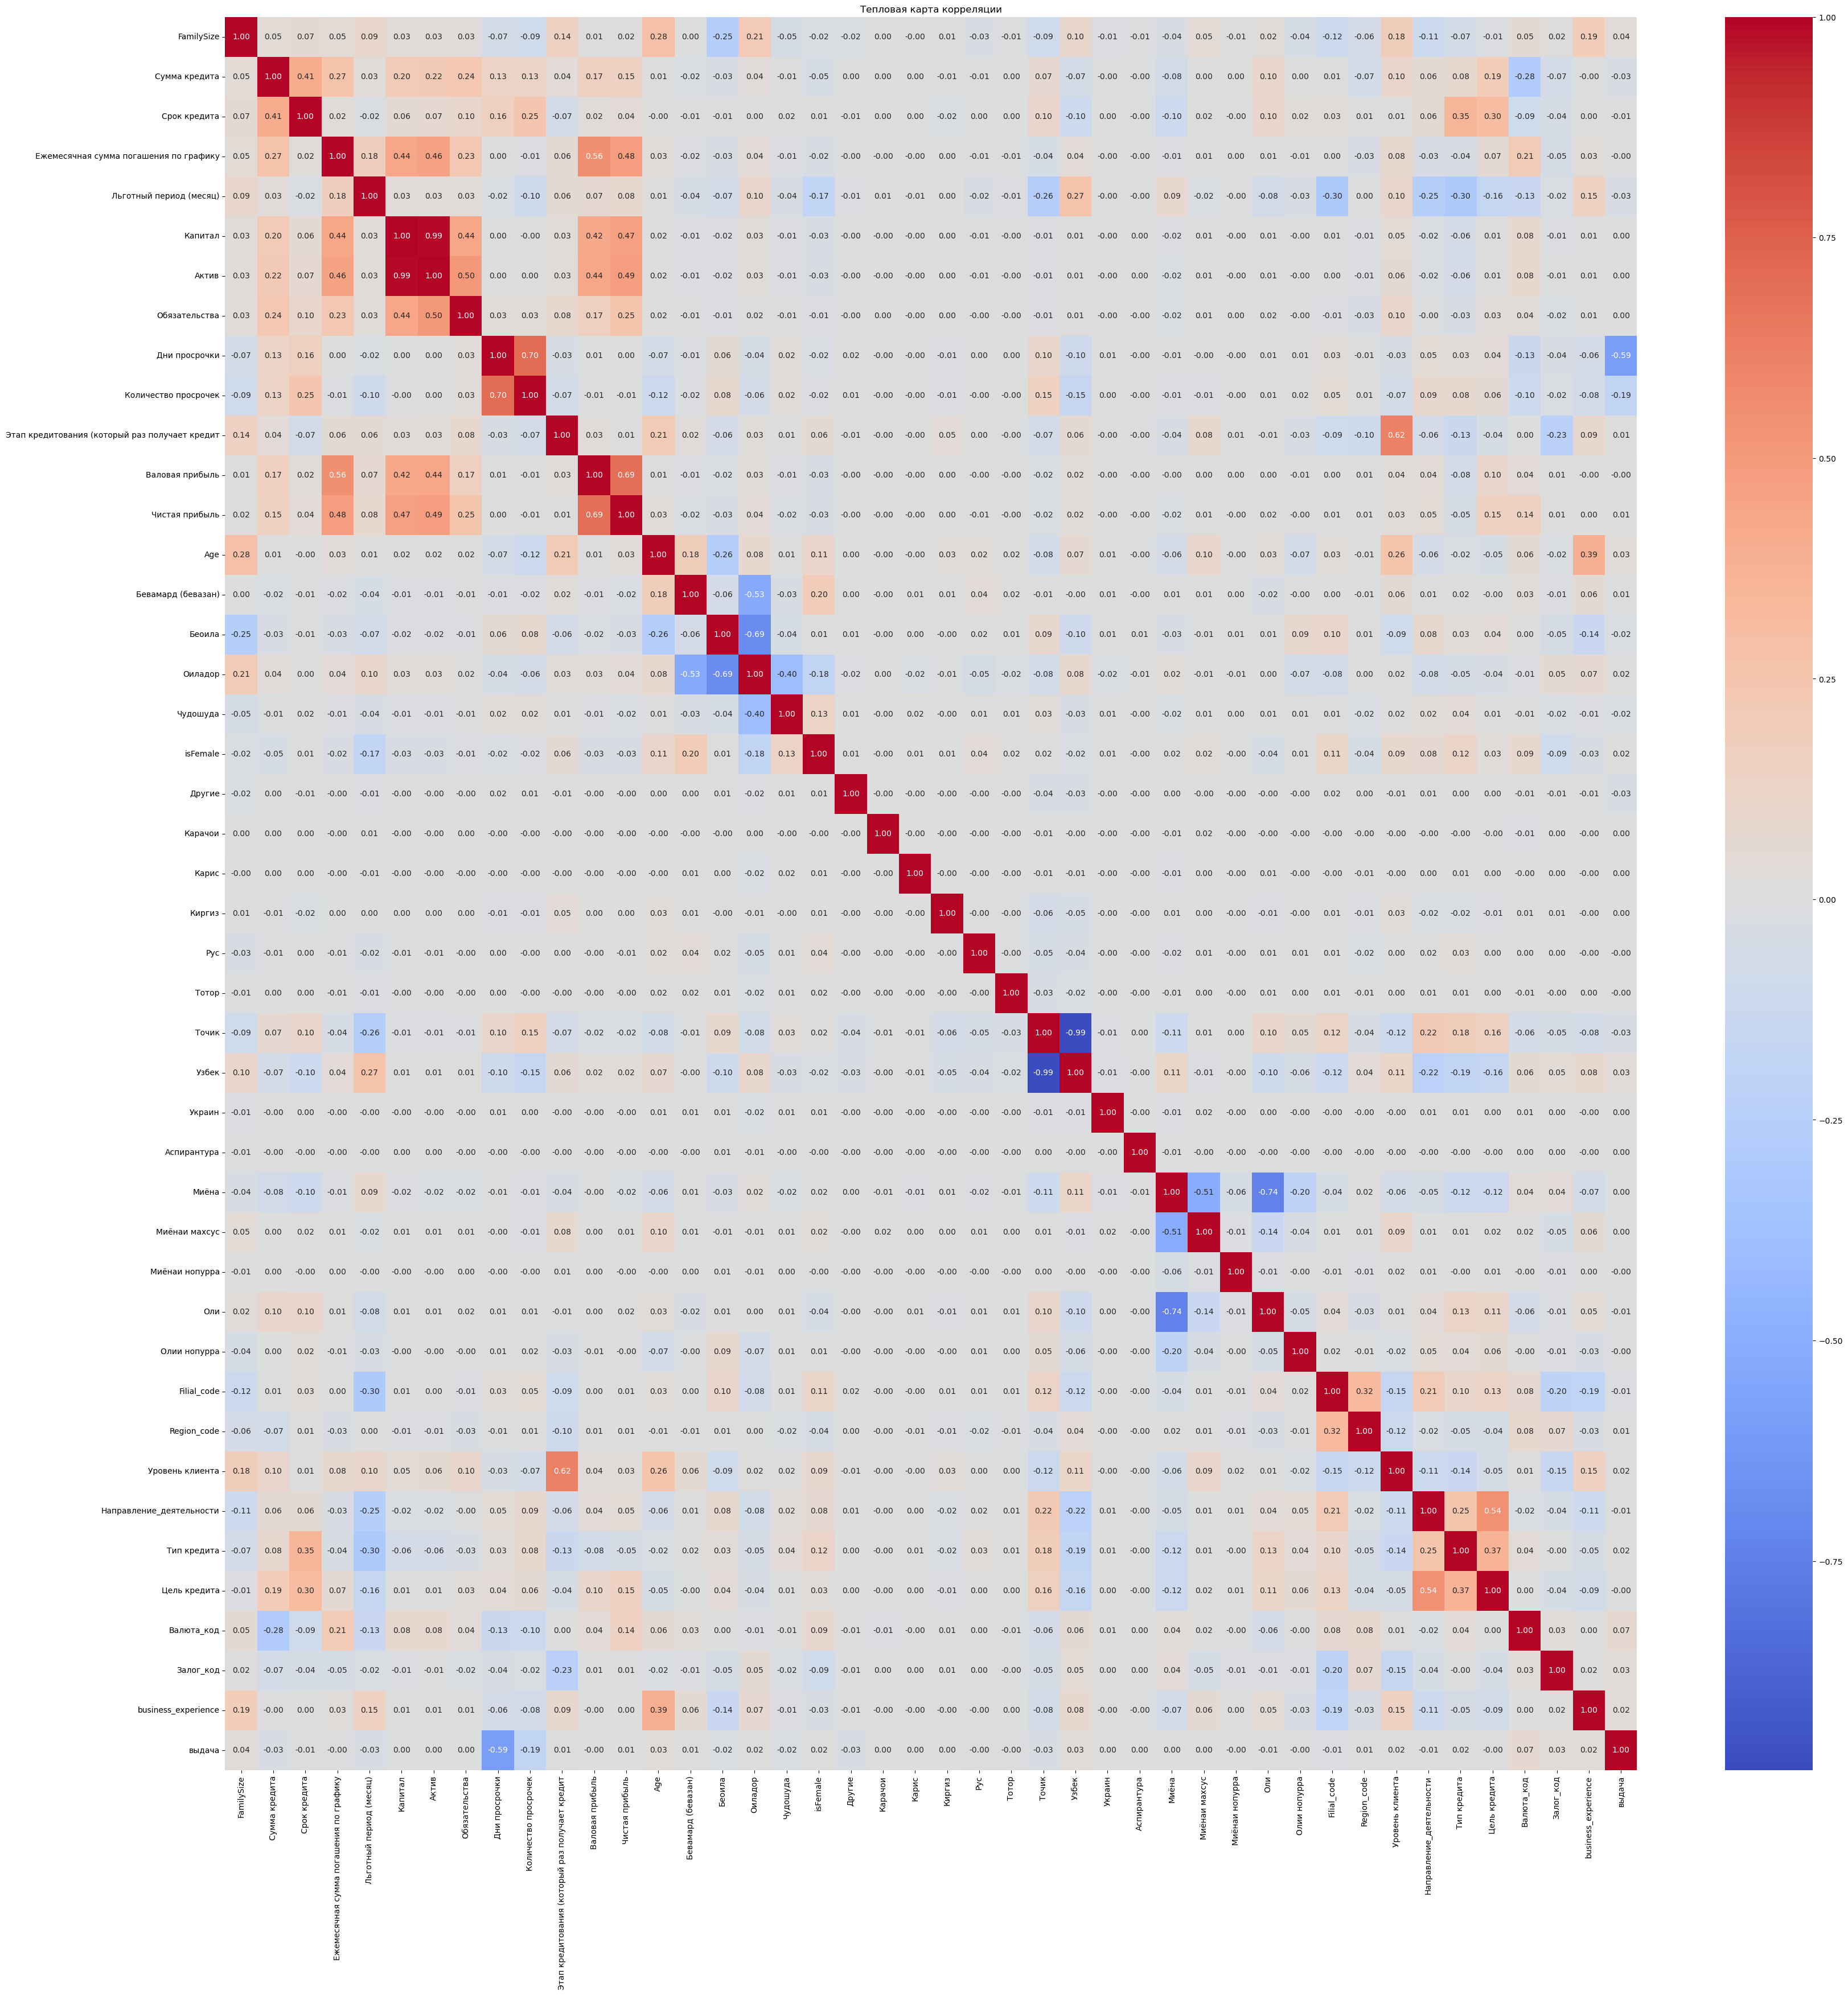

In [72]:
# Вычисляем корреляцию
correlation_matrix = data2.corr()

# Рисуем тепловую карту корреляции
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

Исходя из features importance, используем в качестве входных данных следующие переменные:

In [75]:
#Берем переменные, у которох Importance выше 0.1
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [76]:
from sklearn.model_selection import train_test_split
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) Lofistic Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9946150544347758
Confusion Matrix:
[[  106    88]
 [   50 25383]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.55      0.61       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           0.99     25627
   macro avg       0.84      0.77      0.80     25627
weighted avg       0.99      0.99      0.99     25627



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.metrics import roc_auc_score
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9579266485907383


### Б) Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
DecTree_model = DecisionTreeClassifier()
DecTree_model.fit(X_train, y_train)
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.9992976157958403
Confusion Matrix:
[[  185     9]
 [    9 25424]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.98      0.98      0.98     25627
weighted avg       1.00      1.00      1.00     25627



In [80]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9766271882338109


### В) Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

randf_model = RandomForestClassifier()
randf_model.fit(X_train, y_train)
y_pred = randf_model.predict(X_test)
# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9972294845280368
Confusion Matrix:
[[  131    63]
 [    8 25425]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.68      0.79       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.84      0.89     25627
weighted avg       1.00      1.00      1.00     25627



In [82]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9989711191847914


### Г) К-neigbors

In [83]:
from sklearn.neighbors import KNeighborsClassifier


k = 2  
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9863815507082374
Confusion Matrix:
[[   40   154]
 [  195 25238]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.17      0.21      0.19       194
         1.0       0.99      0.99      0.99     25433

    accuracy                           0.99     25627
   macro avg       0.58      0.60      0.59     25627
weighted avg       0.99      0.99      0.99     25627



In [84]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.599495804825373


### Е) Boosting XGB

In [85]:
from xgboost import XGBClassifier

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)


print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 0.9991025090724627
Confusion Matrix:
[[  182    12]
 [   11 25422]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.97      0.97      0.97     25627
weighted avg       1.00      1.00      1.00     25627



In [86]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9994537011745425
Confusion Matrix:
[[  183    11]
 [    3 25430]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       194
         1.0       1.00      1.00      1.00     25433

    accuracy                           1.00     25627
   macro avg       0.99      0.97      0.98     25627
weighted avg       1.00      1.00      1.00     25627



Лучший резултат дал модель Дерево Решений. Переходим дальше и смотрим Трешхолд 0 дней

### Трешхолд 0 дней

In [87]:
data1.loc[data1['Сред_просрочки']==0, 'выдача']=1
data1.loc[data1['Сред_просрочки']>0, 'выдача']=0

In [88]:
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,0.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,0.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,0.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,0.0


In [89]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [90]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


y = data3['выдача']
X = data3.drop('выдача', axis=1)  # Используйте все остальные столбцы в качестве независимых переменных


### А) логистическая регрессия 

In [92]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9033051078940181
Confusion Matrix:
[[11525  1512]
 [  966 11624]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90     13037
         1.0       0.88      0.92      0.90     12590

    accuracy                           0.90     25627
   macro avg       0.90      0.90      0.90     25627
weighted avg       0.90      0.90      0.90     25627



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9629193637976546


### Б) дерево решений;

In [94]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [95]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 1.0


### В) случайны лес;

In [96]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [97]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 1.0


### Г) К-ближайших соседей;

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.5390798766925509
Confusion Matrix:
[[10026  3011]
 [ 8801  3789]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.77      0.63     13037
         1.0       0.56      0.30      0.39     12590

    accuracy                           0.54     25627
   macro avg       0.54      0.53      0.51     25627
weighted avg       0.54      0.54      0.51     25627



In [99]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.5576404250065328


### Е) алгоритмы бустинга

In [100]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [101]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 1.0
Confusion Matrix:
[[13037     0]
 [    0 12590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13037
         1.0       1.00      1.00      1.00     12590

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [102]:
import pickle

# Сохранение модели в файл
with open('Dec_Tree_model.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)  

В данном трешхолде идеальный результат показали сразу несколько моделей: Дерево решений, Случайное лес, Алгоритмы бустинга 

## Трешхолд 7 дней

In [103]:
data1.loc[data1['Сред_просрочки']<=7, 'выдача']=1
data1.loc[data1['Сред_просрочки']>7, 'выдача']=0

In [104]:
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,0.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,0.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,1.0


In [105]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [106]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [107]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9553595816911851
Confusion Matrix:
[[ 1701   778]
 [  366 22782]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      2479
         1.0       0.97      0.98      0.98     23148

    accuracy                           0.96     25627
   macro avg       0.89      0.84      0.86     25627
weighted avg       0.95      0.96      0.95     25627



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9452409223131815


### Б) дерево решений;

In [109]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9995707652085691
Confusion Matrix:
[[ 2473     6]
 [    5 23143]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [110]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9986818339195257


### В) случайны лес;

In [111]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9854450384360245
Confusion Matrix:
[[ 2193   286]
 [   87 23061]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      2479
         1.0       0.99      1.00      0.99     23148

    accuracy                           0.99     25627
   macro avg       0.97      0.94      0.96     25627
weighted avg       0.99      0.99      0.99     25627



In [112]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9988666244527298


### Г) К-ближайших соседей;

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8132438443828774
Confusion Matrix:
[[  877  1602]
 [ 3184 19964]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.22      0.35      0.27      2479
         1.0       0.93      0.86      0.89     23148

    accuracy                           0.81     25627
   macro avg       0.57      0.61      0.58     25627
weighted avg       0.86      0.81      0.83     25627



In [114]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.6135473522778832


### Е) алгоритмы бустинга

In [115]:
# XGBoost
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 0.9994927225192181
Confusion Matrix:
[[ 2477     2]
 [   11 23137]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



In [116]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')


Gradient Boosting:
Accuracy: 0.9998439146212978
Confusion Matrix:
[[ 2478     1]
 [    3 23145]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2479
         1.0       1.00      1.00      1.00     23148

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



Лучший результат показали Дерево решений, GradientBoost и CatBoost



# Порог 15 дней 

In [118]:
data1.loc[data1['Сред_просрочки']<=15, 'выдача']=1
data1.loc[data1['Сред_просрочки']>15, 'выдача']=0

In [119]:
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,1.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,1.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,1.0


In [120]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [121]:
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [122]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9822062668279549
Confusion Matrix:
[[  544   328]
 [  128 24627]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.62      0.70       872
         1.0       0.99      0.99      0.99     24755

    accuracy                           0.98     25627
   macro avg       0.90      0.81      0.85     25627
weighted avg       0.98      0.98      0.98     25627



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9515608467569335


### Б) дерево решений;

In [124]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9992585944511648
Confusion Matrix:
[[  860    12]
 [    7 24748]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [125]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9929778804763749


### В) случайны лес;

In [126]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9911031334139775
Confusion Matrix:
[[  671   201]
 [   27 24728]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       872
         1.0       0.99      1.00      1.00     24755

    accuracy                           0.99     25627
   macro avg       0.98      0.88      0.93     25627
weighted avg       0.99      0.99      0.99     25627



In [127]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9990006189093482


### Г) К-ближайших соседей;

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9327272017793733
Confusion Matrix:
[[  218   654]
 [ 1070 23685]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.17      0.25      0.20       872
         1.0       0.97      0.96      0.96     24755

    accuracy                           0.93     25627
   macro avg       0.57      0.60      0.58     25627
weighted avg       0.95      0.93      0.94     25627



In [130]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.6048619128004907


### Е) алгоритмы бустинга

In [131]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 0.9991415304171382
Confusion Matrix:
[[  862    10]
 [   12 24743]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [132]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9998439146212978
Confusion Matrix:
[[  871     1]
 [    3 24752]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       872
         1.0       1.00      1.00      1.00     24755

    accuracy                           1.00     25627
   macro avg       1.00      1.00      1.00     25627
weighted avg       1.00      1.00      1.00     25627



В данном трешхолде одинаковые хорошие результаты показали GradientBoost и CatBoost, а также неплохой результат показала модель Дерево решени
й

#порог  20 дней 

In [133]:
data1.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data1.loc[data1['Сред_просрочки']>20, 'выдача']=0
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,1.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,1.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,1.0


In [134]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [135]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.989542279626956
Confusion Matrix:
[[  342   188]
 [   80 25017]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72       530
         1.0       0.99      1.00      0.99     25097

    accuracy                           0.99     25627
   macro avg       0.90      0.82      0.86     25627
weighted avg       0.99      0.99      0.99     25627



In [136]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.9575899848211581


### Б) дерево решений;

In [137]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9994927225192181
Confusion Matrix:
[[  527     3]
 [   10 25087]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      1.00      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [140]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.9969705843215118


### В) случайны лес;

In [141]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9944589690560737
Confusion Matrix:
[[  407   123]
 [   19 25078]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           0.99     25627
   macro avg       0.98      0.88      0.92     25627
weighted avg       0.99      0.99      0.99     25627



In [142]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.999201062143036


### Г) К-ближайших соседей;

In [143]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9598470363288719
Confusion Matrix:
[[  116   414]
 [  615 24482]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.16      0.22      0.18       530
         1.0       0.98      0.98      0.98     25097

    accuracy                           0.96     25627
   macro avg       0.57      0.60      0.58     25627
weighted avg       0.97      0.96      0.96     25627



In [144]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.5979540138977748


### Е) алгоритмы бустинга

In [145]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 0.9993756584851914
Confusion Matrix:
[[  523     7]
 [    9 25088]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      0.99      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [146]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9995707652085691
Confusion Matrix:
[[  525     5]
 [    6 25091]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       530
         1.0       1.00      1.00      1.00     25097

    accuracy                           1.00     25627
   macro avg       0.99      1.00      0.99     25627
weighted avg       1.00      1.00      1.00     25627



In [149]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')




XGBoost:
AUC: 0.9999813553600708

Gradient Boosting:
AUC: 0.999974739520096


In [150]:
import pickle

# Сохранение модели в файл
with open('DecTree_model2.pkl', 'wb') as file:
    pickle.dump(DecTree_model, file)
with open('knn_model2.pkl', 'wb') as file:
    pickle.dump(knn_model, file)
with open('lr_model2.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

В данном трешхолде неплохие результаты показали Дерево решений и модели бустинга

## Трешхолд 60 дней 

In [151]:
data1.loc[data1['Сред_просрочки']<=60, 'выдача']=1
data1.loc[data1['Сред_просрочки']>60, 'выдача']=0
data1

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Обязательства,Дни просрочки,Количество просрочек,...,Region_code,Уровень клиента,Направление_деятельности,Тип кредита,Цель кредита,Валюта_код,Залог_код,business_experience,Сред_просрочки,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,0.0,46,4,...,0,0,0,0,0,0,2,2,11.500000,1.0
1,3,1000.00,12,109.67,0,0.0,0.0,0.0,11,5,...,1,0,1,1,1,1,4,1,2.200000,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0.0,0,0,...,1,1,2,1,2,1,3,1,0.000000,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0.0,0,0,...,0,0,0,0,0,1,2,0,0.000000,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,543.0,15,2,...,2,1,0,0,0,1,4,0,7.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,0.0,53,6,...,35,0,0,0,0,1,2,1,8.833333,1.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0.0,0,0,...,3,1,4,0,5,0,2,1,0.000000,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,44800.0,0,0,...,37,3,2,3,11,1,2,1,0.000000,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,0.0,2,2,...,23,2,0,0,0,1,3,0,1.000000,1.0


In [152]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)
X = data3.drop("выдача", axis=1)
y = data3["выдача"]
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### А) логистическая регрессия

In [153]:
# Инициализация модели логистической регрессии
lr_model = LogisticRegression()

# Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = lr_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9986732742810317
Confusion Matrix:
[[    3    26]
 [    8 25590]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.27      0.10      0.15        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.64      0.55      0.57     25627
weighted avg       1.00      1.00      1.00     25627



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
auc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print("Логистическая регрессия:")
print(f'AUC: {auc_lr}')

Логистическая регрессия:
AUC: 0.8917116369543955


### Б) дерево решений;

In [155]:
# Инициализация модели дерева решений
DecTree_model = DecisionTreeClassifier()

# Обучение модели на тренировочных данных
DecTree_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = DecTree_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9995317438638935
Confusion Matrix:
[[   22     7]
 [    5 25593]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.91      0.88      0.89     25627
weighted avg       1.00      1.00      1.00     25627



In [156]:
auc_DecTree = roc_auc_score(y_test, DecTree_model.predict_proba(X_test)[:, 1])
print("\nдерево решений:")
print(f'AUC: {auc_DecTree}')


дерево решений:
AUC: 0.8792126809475956


### В) случайны лес;

In [157]:
# Инициализация модели дерева решений
randf_model = RandomForestClassifier()

# Обучение модели на тренировочных данных
randf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = randf_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9989464236937605
Confusion Matrix:
[[    2    27]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.53      0.56     25627
weighted avg       1.00      1.00      1.00     25627



In [158]:
auc_randf = roc_auc_score(y_test, randf_model.predict_proba(X_test)[:, 1])
print("\nслучайны лес:")
print(f'AUC: {auc_randf}')


случайны лес:
AUC: 0.9986084580961336


### Г) К-ближайших соседей;

In [159]:
from sklearn.neighbors import KNeighborsClassifier

# Инициализация модели k-ближайших соседей
k = 2  # у нас только два значения: выдать или не выдать
knn_model = KNeighborsClassifier(n_neighbors=k)

# Обучение модели на тренировочных данных
knn_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = knn_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9975416552854411
Confusion Matrix:
[[    1    28]
 [   35 25563]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.03      0.03      0.03        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.51      0.52      0.51     25627
weighted avg       1.00      1.00      1.00     25627



In [161]:
auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print("\nK-ближайших соседей:")
print(f'AUC: {auc_knn}')


K-ближайших соседей:
AUC: 0.5165577321504105


### Е) алгоритмы бустинга

In [162]:
xgb_model = XGBClassifier()

# Обучение модели на тренировочных данных
xgb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Вывод результатов
print("XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix_xgb}')
print(f'Classification Report:\n{classification_rep_xgb}')

XGBoost:
Accuracy: 0.9994537011745425
Confusion Matrix:
[[   20     9]
 [    5 25593]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       0.90      0.84      0.87     25627
weighted avg       1.00      1.00      1.00     25627



In [163]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()

# Обучение модели на тренировочных данных
gb_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = gb_model.predict(X_test)

# Оценка качества модели
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Вывод результатов
print("\nGradient Boosting:")
print(f'Accuracy: {accuracy_gb}')
print(f'Confusion Matrix:\n{conf_matrix_gb}')
print(f'Classification Report:\n{classification_rep_gb}')



Gradient Boosting:
Accuracy: 0.9991025090724627
Confusion Matrix:
[[    6    23]
 [    0 25598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.21      0.34        29
         1.0       1.00      1.00      1.00     25598

    accuracy                           1.00     25627
   macro avg       1.00      0.60      0.67     25627
weighted avg       1.00      1.00      1.00     25627



In [164]:
# Вычисление AUC для моделей
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_gb = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])


# Вывод результатов
print("XGBoost:")
print(f'AUC: {auc_xgb}')

print("\nGradient Boosting:")
print(f'AUC: {auc_gb}')

print("\nCatBoost:")



XGBoost:
AUC: 0.9954771520404342

Gradient Boosting:
AUC: 0.29406190138777005

CatBoost:


В данном трешхолде также неплохие результаты показали Дерево решений, XGBoost и CatBoost

Исходя из результатов, я выбрал трешхолд 0 дней и 3 модели для классификации: Лог.регрессию, Дерево решений и KNN

# 4. Теперь, используя кол-во просроченных дней делайте регрессию.

In [165]:
data1.columns

Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Обязательства', 'Дни просрочки',
       'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Бевамард (бевазан)', 'Беоила', 'Оиладор',
       'Чудошуда', 'isFemale', 'Другие', 'Карачои', 'Карис', 'Киргиз', 'Рус',
       'Тотор', 'Точик', 'Узбек', 'Украин', 'Аспирантура', 'Миёна',
       'Миёнаи махсус', 'Миёнаи нопурра', 'Оли', 'Олии нопурра', 'Filial_code',
       'Region_code', 'Уровень клиента', 'Направление_деятельности',
       'Тип кредита', 'Цель кредита', 'Валюта_код', 'Залог_код',
       'business_experience', 'Сред_просрочки', 'выдача'],
      dtype='object')

In [166]:
data2 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

FamilySize                                        3.945220e-04
Сумма кредита                                     2.863213e-07
Срок кредита                                      6.487596e-04
Ежемесячная сумма погашения по графику            1.419629e-07
Льготный период (месяц)                           1.638961e-03
Капитал                                           7.353402e-08
Актив                                             6.483213e-08
Количество просрочек                              2.667446e-02
Этап кредитования (который раз получает кредит    3.256520e-07
Валовая прибыль                                   6.277880e-10
Чистая прибыль                                    3.442622e-08
Age                                               2.130926e-04
Бевамард (бевазан)                                1.910446e-03
Беоила                                            1.262332e-03
Оиладор                                           1.846882e-03
Чудошуда                                          5.019

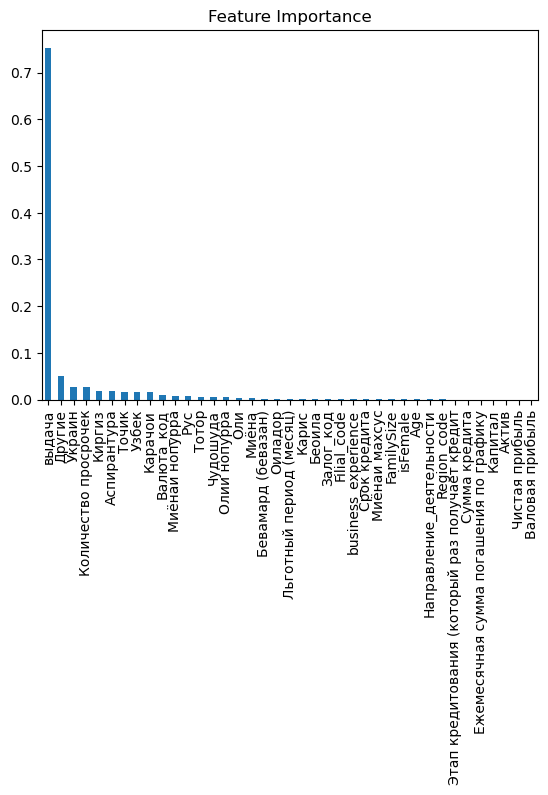

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = data2['Дни просрочки']
X = data2.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Важность признаков - абсолютные значения коэффициентов
feature_importance = pd.Series(abs(model.coef_), index=X.columns)
feature_importance = feature_importance / feature_importance.sum()  # Нормализация для получения доли важности
print(feature_importance)

# Визуализация важности признаков
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделите данные на тренировочный и тестовый наборы
X_reg = data2.drop('Дни просрочки', axis=1)
y_reg = data2['Дни просрочки']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Предсказание на тестовом наборе
y_pred_reg = model_reg.predict(X_test_reg)

# Оценка качества модели
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Веса признаков
feature_weights = dict(zip(data2.drop('Дни просрочки', axis=1), model_reg.coef_))
print('Веса признаков:', feature_weights)


Mean Squared Error: 1059.4170308707435
R^2 Score: 0.5500786925727817
Веса признаков: {'FamilySize': -0.17027544587823998, 'Сумма кредита': 0.00012357608529410324, 'Срок кредита': -0.2800042404697519, 'Ежемесячная сумма погашения по графику': 6.127108537086344e-05, 'Льготный период (месяц)': 0.7073744169978821, 'Капитал': -3.1737237223284464e-05, 'Актив': 2.798150729214858e-05, 'Количество просрочек': 11.5126823820179, 'Этап кредитования (который раз получает кредит': -0.00014055120170428936, 'Валовая прибыль': -2.709529294464443e-07, 'Чистая прибыль': 1.4858336380378058e-05, 'Age': 0.09197063262959333, 'Бевамард (бевазан)': -0.8245471729223374, 'Беоила': -0.544821530057706, 'Оиладор': -0.7971133023445327, 'Чудошуда': 2.16648200651595, 'isFemale': 0.11136841138733891, 'Другие': 21.699877139322687, 'Карачои': -6.841401865946145, 'Карис': 0.6523384610964017, 'Киргиз': -7.854221786216117, 'Рус': -2.7978365291922183, 'Тотор': -2.572815690760687, 'Точик': -7.249117554828525, 'Узбек': -6.9629

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data2.drop(['Дни просрочки'], axis=1)
X_with_const = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)
vif_data = pd.DataFrame()
vif_data["Признак"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print('\nVIF:')
print(vif_data)

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF:
                                           Признак        VIF
0                                            const   0.000000
1                                       FamilySize   1.190601
2                                    Сумма кредита   1.537228
3                                     Срок кредита   1.315661
4           Ежемесячная сумма погашения по графику   1.904514
5                          Льготный период (месяц)   1.377838
6                                          Капитал  44.872242
7                                            Актив  46.596081
8                             Количество просрочек   1.121254
9   Этап кредитования (который раз получает кредит   1.162201
10                                 Валовая прибыль   2.288611
11                                  Чистая прибыль   2.183668
12                                             Age   1.434646
13                              Бевамард (бевазан)        inf
14                                          Беоила        inf
15

In [173]:
#В конечном итоге выбираем только следующие переменные:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

## Линейная регрессия, МНК 

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y = data3['Дни просрочки']
X = data3.drop(['Дни просрочки'], axis=1)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация модели линейной регрессии
linreg = LinearRegression()

# Обучение модели
linreg.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = linreg.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print('Коэффициенты регрессии:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

Mean Squared Error: 1059.4170308707435
R^2 Score: 0.5500786925727817
Коэффициенты регрессии:
FamilySize: -0.17027544587823998
Сумма кредита: 0.00012357608529410324
Срок кредита: -0.2800042404697519
Ежемесячная сумма погашения по графику: 6.127108537086344e-05
Льготный период (месяц): 0.7073744169978821
Капитал: -3.1737237223284464e-05
Актив: 2.798150729214858e-05
Количество просрочек: 11.5126823820179
Этап кредитования (который раз получает кредит: -0.00014055120170428936
Валовая прибыль: -2.709529294464443e-07
Чистая прибыль: 1.4858336380378058e-05
Age: 0.09197063262959333
Бевамард (бевазан): -0.8245471729223374
Беоила: -0.544821530057706
Оиладор: -0.7971133023445327
Чудошуда: 2.16648200651595
isFemale: 0.11136841138733891
Другие: 21.699877139322687
Карачои: -6.841401865946145
Карис: 0.6523384610964017
Киргиз: -7.854221786216117
Рус: -2.7978365291922183
Тотор: -2.572815690760687
Точик: -7.249117554828525
Узбек: -6.962952818583945
Украин: 11.926130646115409
Аспирантура: 7.6684595210319

   Mean Squared Error (MSE): 1064.291279536607 - это среднеквадратичная ошибка, которая измеряет разницу между фактическими значениями и предсказанными значениями.

   R^2 Score:0.5480086594615827 - это коэффициент детерминации, который представляет собой долю объясненной дисперсии в общей дисперсии данных. Значение 0.5480086594615827 говорит о том, что модель объясняет примерно 51.9% изменчивости в данных, что можно считать умеренным результатом.

   Коэффициенты регрессии: Они предоставляют информацию о весах, с которыми каждый из ваших признаков влияет на целевую переменную. Например, "Количество просрочек" имеет положительный вес 11.5, что означает сильное влияние на увеличение "Дни просрочек". "Срок кредита" имеет отрицательный вес (-0.3), что может указывать на то, что увеличение срока кредита связано с уменьшением "Дни просрочек".

## Случайный лес

In [175]:
from sklearn.ensemble import RandomForestRegressor

# Инициализация и обучение модели случайного леса
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = model_rf.predict(X_test)

# Оценка качества модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод результатов
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 804.4337091934289
R^2 Score (Random Forest): 0.6583669550022625


   Mean Squared Error (MSE): 861.66 - уменьшился по сравнению с результатами линейной регрессии, что указывает на лучшую точность предсказаний модели.

   R^2 Score (Random Forest): 0.634 - увеличился по сравнению с линейной регрессией, что также говорит о более хорошем объяснении изменчивости в данных.

## GradientBoost

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация и обучение модели градиентного бустинга
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_gb = model_gb.predict(X_test)

# Оценка качества модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Вывод результатов
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R^2 Score (Gradient Boosting): {r2_gb}')


Mean Squared Error (Gradient Boosting): 788.2000214574113
R^2 Score (Gradient Boosting): 0.6652612013639159


In [177]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb.pkl', 'wb') as file:
    pickle.dump(model_gb, file)

In [181]:
data3 = data1.drop(['Сред_просрочки','Обязательства','Цель кредита','Тип кредита','Уровень клиента'], axis=1)

In [182]:
data3.loc[data1['Сред_просрочки']<=20, 'выдача']=1
data3.loc[data1['Сред_просрочки']>20, 'выдача']=0

In [183]:
data3

,FamilySize,Сумма кредита,Срок кредита,Ежемесячная сумма погашения по графику,Льготный период (месяц),Капитал,Актив,Дни просрочки,Количество просрочек,Этап кредитования (который раз получает кредит,...,Миёнаи нопурра,Оли,Олии нопурра,Filial_code,Region_code,Направление_деятельности,Валюта_код,Залог_код,business_experience,выдача
0,3,6793.20,12,181.00,6,2820.0,3000.0,46,4,1,...,0,1,0,0,0,0,0,2,2,1.0
1,3,1000.00,12,109.67,0,0.0,0.0,11,5,1,...,0,0,0,0,1,1,1,4,1,1.0
2,3,7600.00,12,805.00,0,0.0,0.0,0,0,2,...,0,0,0,0,1,2,1,3,1,1.0
3,0,1500.00,12,162.93,1,5050.0,5200.0,0,0,1,...,0,0,0,0,0,0,1,2,0,1.0
4,1,2500.00,12,465.94,6,6777.0,7600.0,15,2,2,...,0,0,0,1,2,0,1,4,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85417,0,5000.00,12,558.00,1,0.0,0.0,53,6,1,...,0,0,0,2,35,0,1,2,1,1.0
85418,1,9510.48,24,74.00,0,5000.0,5000.0,0,0,1,...,0,0,0,2,3,4,0,2,1,1.0
85419,3,30000.00,36,1264.00,1,51600.0,96400.0,0,0,1,...,0,1,0,2,37,2,1,2,1,1.0
85420,2,3000.00,12,295.00,0,12600.0,12600.0,2,2,1,...,0,0,0,2,23,0,1,3,0,1.0


In [184]:
from sklearn.ensemble import GradientBoostingRegressor

X_regression = data3[data3['выдача'] == 0].drop(['Сумма кредита'], axis=1)
y_regression = data3[data3['выдача'] == 0]['Сумма кредита']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

model_regression = GradientBoostingRegressor()
model_regression.fit(X_train_reg, y_train_reg)

y_pred_reg = model_regression.predict(X_test_reg)

In [185]:
#Сохраняем модель градиентного бустинга в пикл файл
with open('model_gb2.pkl', 'wb') as file:
    pickle.dump(model_regression, file)

In [186]:
#Объединяем все три модели для более правильного ответа
with open('lr_model2.pkl', 'rb') as file:
    lr_model = pickle.load(file)
with open('model_gb.pkl', 'rb') as file:
    model_gb = pickle.load(file)
new_data = [[56827.648505155965, 12, 46, 2, 1, 0, 180, 39, 0, 0, 2, 3, 66, 54, 45, 78, 77, 0, 0, 1, 55, 44, 36, 25, 87, 120, 122, 74, 49, 64, 81, 1, 2, 0, 3, 0, 85, 5, 0]]
prediction_class = lr_model.predict(new_data)
new_data2 = [[6793.20, 12, 4, 1, 0, 180, 39, 0, 0, 2, 1, 45, 33, 58, 45, 25, 64, 73, 95, 0, 1, 3, 7, 8, 0, 0, 55, 85, 74, 77, 28, 22, 11, 39, 29, 13, 19, 14, 55]]
prediction_class2 = model_gb.predict(new_data2)
#Вероятность того, что клиент вернет кредит вовремя
new_data_proba = lr_model.predict_proba(new_data)[:, 1]
print(f'Сколько примерно дней просрочит: {prediction_class2[0].astype(int)}')
print(f'Вероятность возврата кредита: {(new_data_proba[0]*100).astype(int)}')
print(f'Вероятность выдачи кредита: {prediction_class[0]*100}')
if prediction_class[0] == 0:  # Если предсказание "нет"
    prediction_sum = model_regression.predict(new_data)
    print(f'Сумма кредита в случае отказа: {prediction_sum[0]}')
else:
    print('Кредит будет выдан.')

Сколько примерно дней просрочит: 50
Вероятность возврата кредита: 100
Вероятность выдачи кредита: 100.0
Кредит будет выдан.


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [187]:
data3.columns


Index(['FamilySize', 'Сумма кредита', 'Срок кредита',
       'Ежемесячная сумма погашения по графику', 'Льготный период (месяц)',
       'Капитал', 'Актив', 'Дни просрочки', 'Количество просрочек',
       'Этап кредитования (который раз получает кредит', 'Валовая прибыль',
       'Чистая прибыль', 'Age', 'Бевамард (бевазан)', 'Беоила', 'Оиладор',
       'Чудошуда', 'isFemale', 'Другие', 'Карачои', 'Карис', 'Киргиз', 'Рус',
       'Тотор', 'Точик', 'Узбек', 'Украин', 'Аспирантура', 'Миёна',
       'Миёнаи махсус', 'Миёнаи нопурра', 'Оли', 'Олии нопурра', 'Filial_code',
       'Region_code', 'Направление_деятельности', 'Валюта_код', 'Залог_код',
       'business_experience', 'выдача'],
      dtype='object')